In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import json
import requests
from pprint import pprint
from scipy.stats import linregress
from scipy import stats

In [7]:
file_Q1=pd.read_csv("Resources/CAvideos_clean.csv")

In [8]:
file_Q1

,video_id,Year,Day,Month,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17,14,11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17,14,11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17,14,11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17,14,11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17,14,11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
5,0yIWz1XEeyc,17,14,11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...
6,_uM5kFfkhB8,17,14,11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...
7,2kyS6SvSYSE,17,14,11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
8,JzCsM1vtn78,17,14,11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...
9,43sm-QwLcx4,17,14,11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...


In [9]:
groupby_Q1=file_Q1.groupby(["Year","Month"])
month=groupby_Q1.mean()
month.round(2)

Day  category_id       views     likes  dislikes  comment_count  \
Year Month                                                                      
17   11     22.00        20.89  1102247.36  41135.88   2089.24        5119.83   
     12     16.00        20.73  1317013.03  47723.31   3528.04        6309.94   
18   1      16.34        20.73   958549.23  35352.67   1874.59        4979.36   
     2      14.52        20.79  1116733.35  33618.51   1371.05        3913.04   
     3      16.00        20.61  1047298.25  34509.70   1492.02        4092.60   
     4      16.74        20.83  1140607.36  40026.22   1574.24        4649.68   
     5      16.01        20.91  1237795.23  41547.96   1962.75        5729.86   
     6       7.50        21.08  1306394.33  46385.60   2086.44        5781.37   

            comments_disabled  ratings_disabled  video_error_or_removed  
Year Month                                                               
17   11                  0.01              0.01                     0.0  
     12                  0.01              0.01                     0.0  
18   1                   0.02              0.01                     0.0  
     2                   0.02              0.01                     0.0  
     3                   0.01              0.01                     0.0  
     4                   0.02              0.01                     0.0  
     5                   0.01              0.00                     0.0  
     6                   0.01              0.00                     0.0

In [10]:
groupby_Q1=file_Q1.groupby(["Day"],as_index=False)
day=groupby_Q1.mean()
day.round(2)

,Day,Year,Month,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,1,17.86,4.73,20.91,928689.51,32140.83,1420.94,4221.16,0.02,0.01,0.0
1,2,17.86,4.72,20.52,985487.76,37479.75,1489.94,4635.51,0.02,0.01,0.0
2,3,17.86,4.72,20.70,1085952.08,38797.18,1698.14,4809.79,0.02,0.01,0.0
3,4,17.86,4.71,20.54,1119801.74,37335.30,1719.83,4620.10,0.02,0.01,0.0
4,5,17.86,4.72,20.86,1121674.66,37007.53,1578.82,4572.76,0.02,0.01,0.0
5,6,17.86,4.72,20.80,1266127.11,42267.36,1660.12,4978.46,0.02,0.01,0.0
6,7,17.86,4.71,20.71,1212416.83,41090.12,1921.06,5326.20,0.01,0.01,0.0
7,8,17.83,4.83,20.80,1210400.66,39087.35,2450.78,5434.77,0.02,0.01,0.0
8,9,17.83,4.84,20.91,1381970.35,42756.06,2848.93,5875.37,0.02,0.01,0.0
9,10,17.80,5.60,21.13,1342748.88,41942.32,3081.54,5809.49,0.02,0.01,0.0


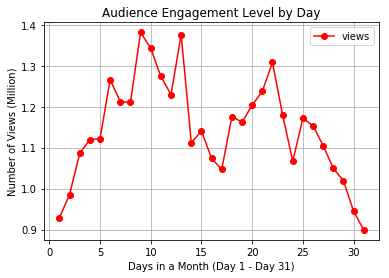

In [11]:
#day.dtypes
#plt.hlines(day["Day"],day["views"],marker="x",facecolors="lightblue",edgecolors="black")
#plt.scatter(day["Day"],day["views"],marker="-",facecolors="lightblue",edgecolors="black")
Views=plt.plot(day["Day"],day["views"]/1000000,marker="o",color="r")

plt.grid()
plt.title("Audience Engagement Level by Day")
plt.xlabel("Days in a Month (Day 1 - Day 31)")
plt.ylabel("Number of Views (Million)")
plt.legend()

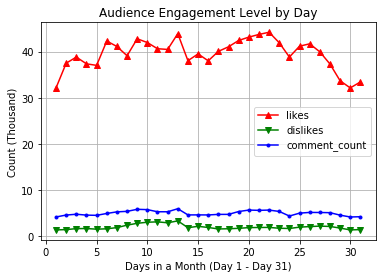

In [12]:
Likes=plt.plot(day["Day"],day["likes"]/1000,marker="^",color="red")
Dislikes=plt.plot(day["Day"],day["dislikes"]/1000,marker="v",color="green")
Comment=plt.plot(day["Day"],day["comment_count"]/1000,marker=".",color="blue")
plt.grid()
plt.title("Audience Engagement Level by Day")
plt.xlabel("Days in a Month (Day 1 - Day 31)")
plt.ylabel("Count (Thousand)")
plt.legend(loc="best")

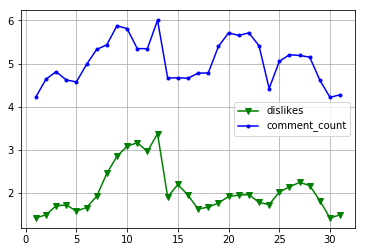

In [13]:
Dislikes=plt.plot(day["Day"],day["dislikes"]/1000,marker="v",color="green")
Comment=plt.plot(day["Day"],day["comment_count"]/1000,marker=".",color="blue")
plt.grid()
plt.legend(loc="best")

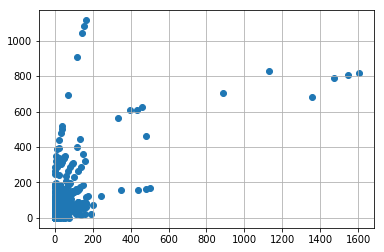

In [14]:
plt.scatter(file_Q1["dislikes"]/1000,file_Q1["comment_count"]/1000,marker='o',)
plt.grid()

(-50, 700)

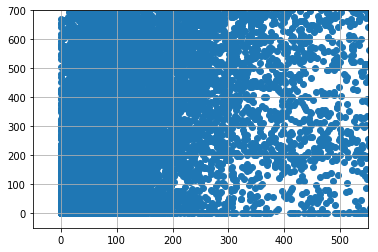

In [15]:
plt.scatter(file_Q1["dislikes"],file_Q1["comment_count"],marker='o')
plt.grid()
plt.xlim(-50,550)
plt.ylim(-50,700)

slope: 0.684459    intercept: 3655.760496
7.879188318889271e-06
r-squared: 0.503303


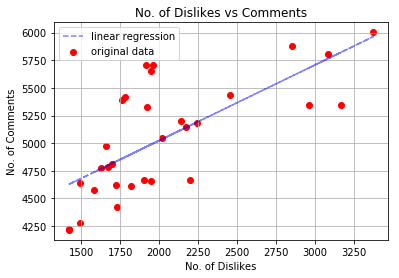

In [16]:
plt.scatter(day["dislikes"],day["comment_count"],marker='o',label="original data",color='r')
plt.grid()
slope, intercept, r_value, p_value, std_err = linregress(day["dislikes"],day["comment_count"])
plt.plot(day["dislikes"],slope*day["dislikes"]+intercept,'b--',alpha=0.5,label="linear regression")
print("slope: %f    intercept: %f" % (slope, intercept))
print(p_value)
print("r-squared: %f" % r_value**2)

plt.title("No. of Dislikes vs Comments")
plt.xlabel("No. of Dislikes")
plt.ylabel("No. of Comments")
plt.legend(loc="best")